In [1696]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

# from utilities import visualize_classifier
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

In [1697]:
data = pandas.read_csv("HR-Employee-Attrition.csv")

In [1698]:
data.shape

(1470, 35)

In [1699]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [1700]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [1701]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [1702]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [1703]:
data = data.dropna()

In [1704]:
# Find columns with only one unique value
constant_cols = [col for col in data.columns if data[col].nunique() == 1]

print("Columns with a single unique value (will be removed):")
print(constant_cols)

# Drop these columns from the DataFrame
data = data.drop(columns=constant_cols)

Columns with a single unique value (will be removed):
['EmployeeCount', 'Over18', 'StandardHours']


In [1705]:
# Re-encode so Yes = 1, No = 0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [1706]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


## Label Encoding

In [1707]:
# Select all the columns that are not numeric
data_column_category = data.select_dtypes(exclude=[np.number]).columns

In [1708]:
# View column categories
data_column_category

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [1709]:
# Print the first five rows of the new dataframe
data[data_column_category].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [1710]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [1711]:
label_encoder = LabelEncoder()

In [1712]:
# Make a copy of your DataFrame
data_encoded = data.copy()

In [1713]:
# Performing label encoding
for i in data_column_category:
    data_encoded[i] = label_encoder.fit_transform(data_encoded[i])

In [1714]:
# View the label encoded data
print("Label Encoded Data: ")
data_encoded.head()

Label Encoded Data: 


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [1715]:
data_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


## Correlation Matrix

In [1716]:
# Assuming 'data' is your DataFrame and 'Attrition' is numeric (or encoded as such)
corr_matrix = data_encoded.corr()['Attrition']
print(corr_matrix)

Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
W

In [1717]:
corr_matrix.shape

(32,)

In [1718]:
# Identify columns to remove
cols_to_remove = corr_matrix[corr_matrix.abs() < 0.1].index.tolist()

print(f"Columns to be removed ({len(cols_to_remove)}): {cols_to_remove}")

Columns to be removed (18): ['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'Gender', 'HourlyRate', 'JobRole', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion']


In [1719]:
data = data.drop(columns=cols_to_remove)

In [1720]:
data.head()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,3,2,4,Single,5993,Yes,0,8,6,4,5
1,49,0,3,2,2,2,Married,5130,No,1,10,10,7,7
2,37,1,4,2,1,3,Single,2090,Yes,0,7,0,0,0
3,33,0,4,3,1,3,Married,2909,Yes,0,8,8,7,0
4,27,0,1,3,1,2,Married,3468,No,1,6,2,2,2


## One-Hot Encoding

In [1721]:
# Select all the columns that are not numeric
data_column_category = data.select_dtypes(exclude=[np.number]).columns

In [1722]:
data_column_category

Index(['MaritalStatus', 'OverTime'], dtype='object')

In [1723]:
# Print the first five rows of the new dataframe
data[data_column_category].head()

,MaritalStatus,OverTime
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,Yes
4,Married,No


In [1724]:
df_onehot_getdummies = pandas.get_dummies(data[data_column_category], prefix=data_column_category)

In [1725]:
data_column_number = data.select_dtypes(include=[np.number]).columns

In [1726]:
data_column_number

Index(['Age', 'Attrition', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

In [1727]:
# Print the first five rows of the new dataframe
data[data_column_number].head()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,3,2,4,5993,0,8,6,4,5
1,49,0,3,2,2,2,5130,1,10,10,7,7
2,37,1,4,2,1,3,2090,0,7,0,0,0
3,33,0,4,3,1,3,2909,0,8,8,7,0
4,27,0,1,3,1,2,3468,1,6,2,2,2


In [1728]:
data_onehot_encoded_data = pandas.concat([df_onehot_getdummies,data[data_column_number]],axis = 1)

In [1729]:
data_onehot_encoded_data.columns

Index(['MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age',
       'Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

In [1730]:
data_onehot_encoded_data

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,False,False,True,False,True,41,1,2,3,2,4,5993,0,8,6,4,5
1,False,True,False,True,False,49,0,3,2,2,2,5130,1,10,10,7,7
2,False,False,True,False,True,37,1,4,2,1,3,2090,0,7,0,0,0
3,False,True,False,False,True,33,0,4,3,1,3,2909,0,8,8,7,0
4,False,True,False,True,False,27,0,1,3,1,2,3468,1,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,True,False,True,False,36,0,3,4,2,4,2571,1,17,5,2,3
1466,False,True,False,True,False,39,0,4,2,3,1,9991,1,9,7,7,7
1467,False,True,False,False,True,27,0,2,4,2,2,6142,1,6,6,2,3
1468,False,True,False,True,False,49,0,4,2,2,2,5390,0,17,9,6,8


In [1731]:
# Move 'Attrition' column to the end
cols = [col for col in data_onehot_encoded_data.columns if col != 'Attrition'] + ['Attrition']
data_onehot_encoded_data = data_onehot_encoded_data[cols]

In [1732]:
data_onehot_encoded_data.head()

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Attrition
0,False,False,True,False,True,41,2,3,2,4,5993,0,8,6,4,5,1
1,False,True,False,True,False,49,3,2,2,2,5130,1,10,10,7,7,0
2,False,False,True,False,True,37,4,2,1,3,2090,0,7,0,0,0,1
3,False,True,False,False,True,33,4,3,1,3,2909,0,8,8,7,0,0
4,False,True,False,True,False,27,1,3,1,2,3468,1,6,2,2,2,0


In [1733]:
array = data_onehot_encoded_data.values

In [1734]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-2], np.argmax(array[:, -2:], axis=1)

In [1735]:
print(X.shape)
print(y.shape)

(1470, 15)
(1470,)


In [1736]:
# Separate input data into classes based on labels of 'Attrition'
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])

In [1737]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.2

In [1738]:
#  Initialize seed parameter for the random number generator used for the split
seed = 7

In [1739]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [1740]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 15)
(1176,)
(294, 15)
(294,)


In [1741]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [1742]:
#data_onehot_encoded_data.to_csv("Data/onehot_encoded_data.csv")

In [1743]:
# draw tree from the trained data by graphviz package
import graphviz

num_feature_names = X.shape[1]

dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=data_onehot_encoded_data.columns[:num_feature_names], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True)

In [1744]:
# result DT saved in file heart.pdf
graph = graphviz.Source(dot_data)
graph.render("company2") 

'company2.pdf'

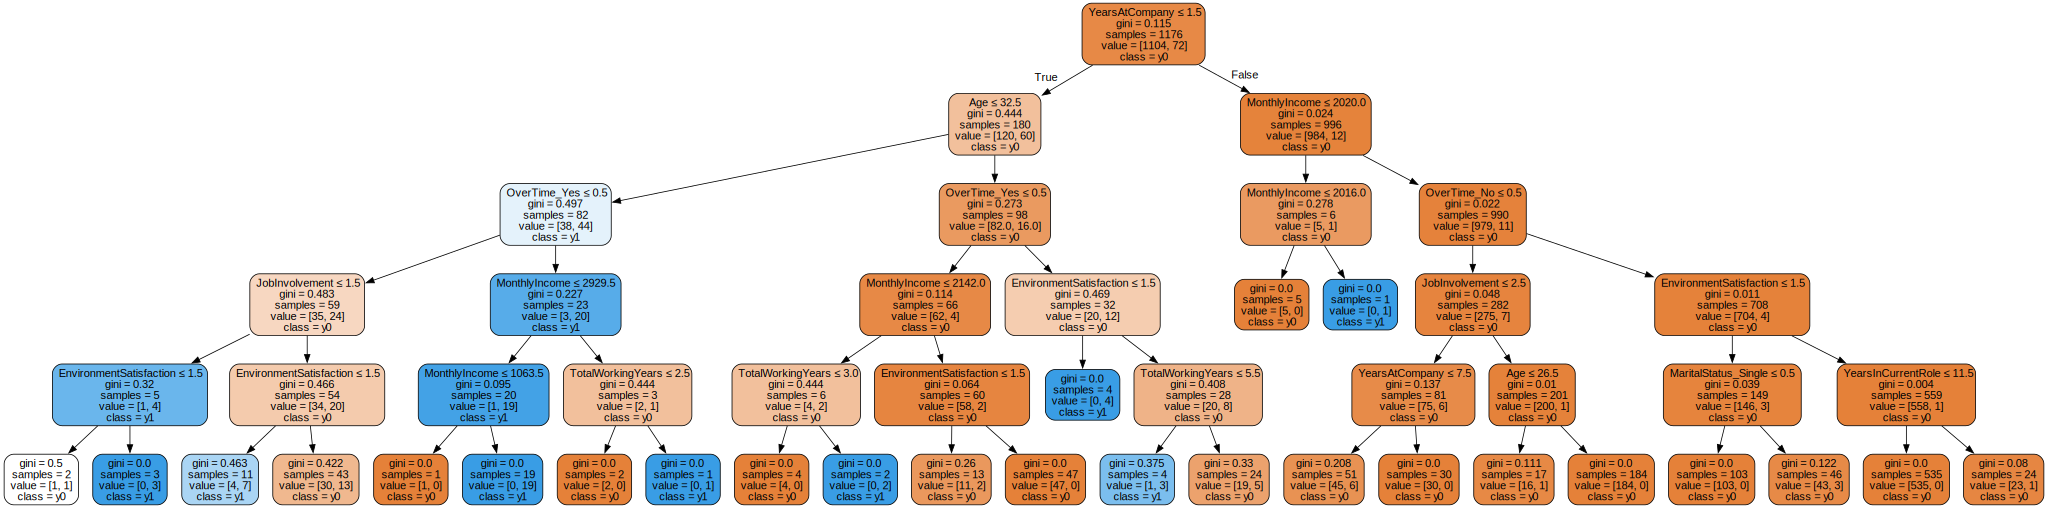

In [1745]:
# show it here
graph

## Step 5. Model Validation

In [1746]:
# Set the metrics
scoring = 'accuracy'

In [1747]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1748]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.9455782312925171


In [1749]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[274,   7],
       [  9,   4]], dtype=int64)

In [1750]:
confusion = pandas.crosstab(y_test,y_testp)
confusion

col_0,0,1
row_0,,
0,274,7
1,9,4


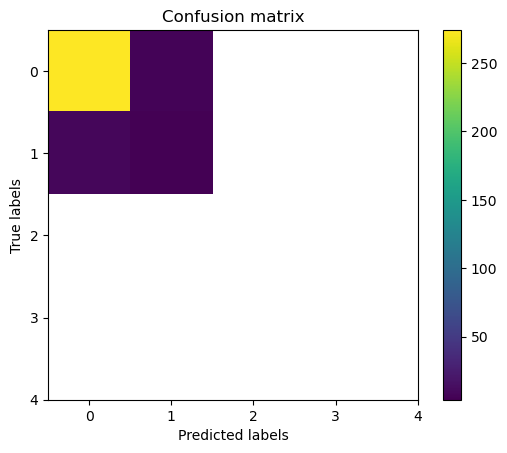

In [1751]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

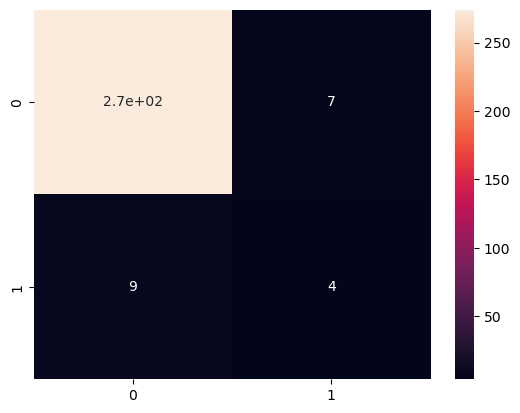

In [1752]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [1753]:
class_names = ['No Attrition', 'Attrition']
# Classifier performance on training dataset
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

No Attrition       0.97      1.00      0.98      1104
   Attrition       0.89      0.56      0.68        72

    accuracy                           0.97      1176
   macro avg       0.93      0.78      0.83      1176
weighted avg       0.97      0.97      0.97      1176



In [1754]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

No Attrition       0.97      0.98      0.97       281
   Attrition       0.36      0.31      0.33        13

    accuracy                           0.95       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.94      0.95      0.94       294

